In [1]:
# from preprocess import preprocess
# from process import process
# preprocess('2015-01-01', '../data/raw', '../data/preprocessed')
# preprocess('2015-01-02', '../data/raw', '../data/preprocessed')
# process('2015-01-01', '2015-01-02', '../data/preprocessed', '../data/processed')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from variables import events

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',    500)
%matplotlib inline

In [3]:
repos = pd.read_csv('../data/preprocessed/2015-01-01/repos_2015-01-02.csv')
repos.head()

,repo_id,repo_name,CheckRunEvent,CheckSuiteEvent,CommitCommentEvent,ContentReferenceEvent,CreateEvent,DeleteEvent,DeployKeyEvent,DeploymentEvent,DeploymentStatusEvent,DownloadEvent,FollowEvent,ForkEvent,ForkApplyEvent,GitHubAppAuthorizationEvent,GistEvent,GollumEvent,InstallationEvent,InstallationRepositoriesEvent,IssueCommentEvent,IssuesEvent,LabelEvent,MarketplacePurchaseEvent,MemberEvent,MembershipEvent,MetaEvent,MilestoneEvent,OrganizationEvent,OrgBlockEvent,PageBuildEvent,ProjectCardEvent,ProjectColumnEvent,ProjectEvent,PublicEvent,PullRequestEvent,PullRequestReviewEvent,PullRequestReviewCommentEvent,PushEvent,RegistryPackageEvent,ReleaseEvent,RepositoryDispatchEvent,RepositoryEvent,RepositoryImportEvent,RepositoryVulnerabilityAlertEvent,SecurityAdvisoryEvent,StarEvent,StatusEvent,TeamEvent,TeamAddEvent,WatchEvent,WatchEventFuture
0,27,rubinius/rubinius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
1,28,mojombo/god,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68,macournoyer/thin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,144,mojombo/chronic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,426,haml/haml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [4]:
repos.describe()

,repo_id,CheckRunEvent,CheckSuiteEvent,CommitCommentEvent,ContentReferenceEvent,CreateEvent,DeleteEvent,DeployKeyEvent,DeploymentEvent,DeploymentStatusEvent,DownloadEvent,FollowEvent,ForkEvent,ForkApplyEvent,GitHubAppAuthorizationEvent,GistEvent,GollumEvent,InstallationEvent,InstallationRepositoriesEvent,IssueCommentEvent,IssuesEvent,LabelEvent,MarketplacePurchaseEvent,MemberEvent,MembershipEvent,MetaEvent,MilestoneEvent,OrganizationEvent,OrgBlockEvent,PageBuildEvent,ProjectCardEvent,ProjectColumnEvent,ProjectEvent,PublicEvent,PullRequestEvent,PullRequestReviewEvent,PullRequestReviewCommentEvent,PushEvent,RegistryPackageEvent,ReleaseEvent,RepositoryDispatchEvent,RepositoryEvent,RepositoryImportEvent,RepositoryVulnerabilityAlertEvent,SecurityAdvisoryEvent,StarEvent,StatusEvent,TeamEvent,TeamAddEvent,WatchEvent,WatchEventFuture
count,6.652300e+04,66523.0,66523.0,66523.000000,66523.0,66523.000000,66523.00000,66523.0,66523.0,66523.0,66523.0,66523.0,66523.000000,66523.0,66523.0,66523.0,66523.000000,66523.0,66523.0,66523.000000,66523.000000,66523.0,66523.0,66523.000000,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.000000,66523.000000,66523.0,66523.000000,66523.000000,66523.0,66523.000000,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.0,66523.000000,66523.000000
mean,2.077554e+07,0.0,0.0,0.021030,0.0,0.359876,0.05780,0.0,0.0,0.0,0.0,0.0,0.107421,0.0,0.0,0.0,0.033011,0.0,0.0,0.256377,0.148129,0.0,0.0,0.007125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002661,0.131368,0.0,0.032665,1.796552,0.0,0.012266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330021,0.273710
std,9.152177e+06,0.0,0.0,0.535271,0.0,0.937147,0.72306,0.0,0.0,0.0,0.0,0.0,0.522233,0.0,0.0,0.0,0.780689,0.0,0.0,2.582019,1.454864,0.0,0.0,0.101891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052668,0.930389,0.0,0.882213,17.687100,0.0,0.155087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.064716,4.832317
min,2.700000e+01,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,1.428239e+07,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,2.516799e+07,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,2.856718e+07,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,2.869889e+07,0.0,0.0,93.000000,0.0,80.000000,100.00000,0.0,0.0,0.0,0.0,0.0,57.000000,0.0,0.0,0.0,81.000000,0.0,0.0,356.000000,287.000000,0.0,0.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,66.000000,0.0,78.000000,3843.000000,0.0,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.000000,960.000000


In [5]:
non_empty_events = [event for event in events if repos[event].max() > 0]
non_empty_events

['CommitCommentEvent',
 'CreateEvent',
 'DeleteEvent',
 'ForkEvent',
 'GollumEvent',
 'IssueCommentEvent',
 'IssuesEvent',
 'MemberEvent',
 'PublicEvent',
 'PullRequestEvent',
 'PullRequestReviewCommentEvent',
 'PushEvent',
 'ReleaseEvent',
 'WatchEvent']

The frequency distribution of most events follow the same pattern: The distributions all have long tails, with the probability drops drastically with increasing number of occurrence of events. Most repos have nearly none events happen to them.

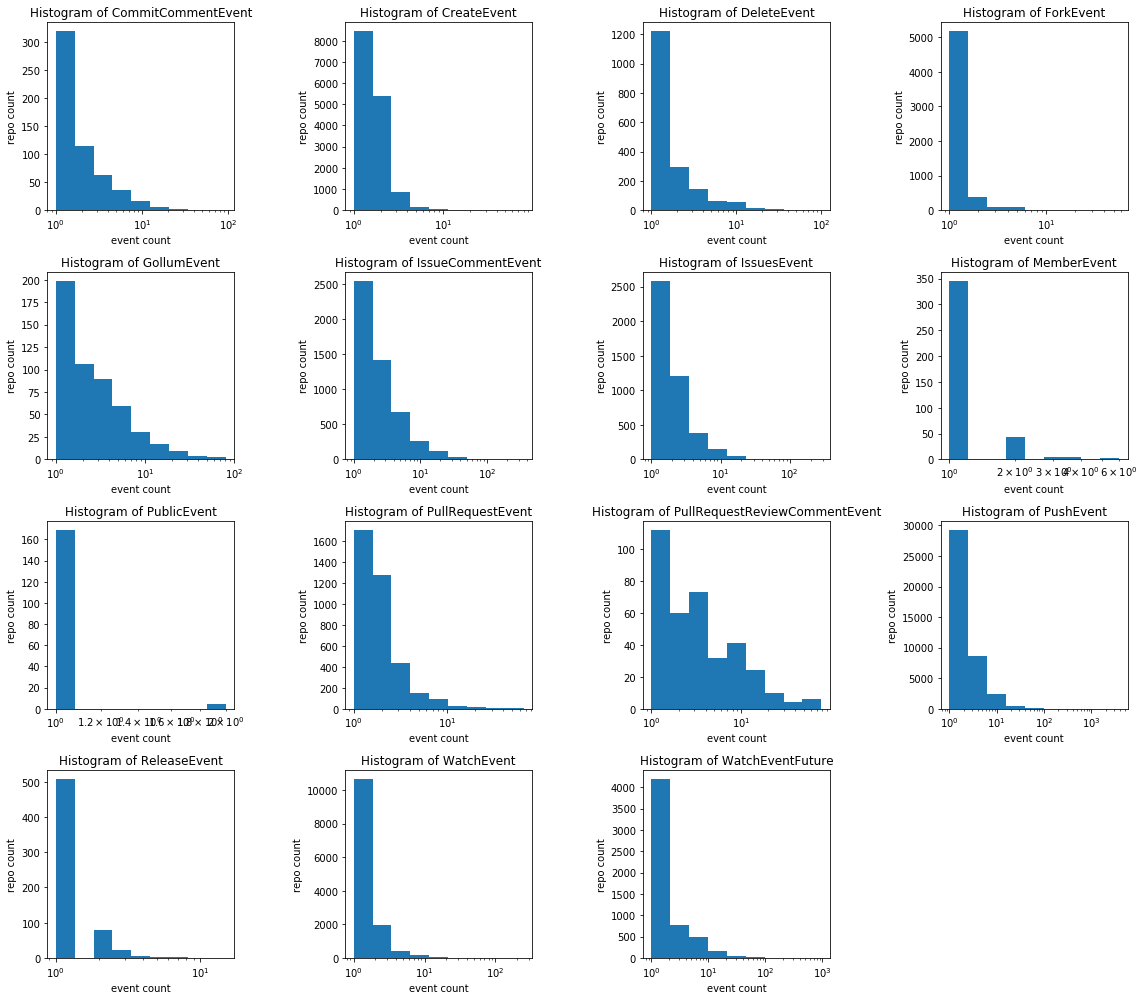

In [6]:
figsize, grid, n_bins = (16, 14), (4, 4), 10
plt.figure(figsize=figsize)
for i, e in enumerate(non_empty_events + ['WatchEventFuture']):
    event_freq = repos[e]
    min_freq = event_freq.min() + 1 # in case of 0: np.log10(min_freq) raises exception
    max_freq = event_freq.max()
    logbins = np.logspace(np.log10(min_freq),np.log10(max_freq), n_bins)
    plt.subplot(*grid, i+1)
    plt.hist(event_freq, bins=logbins)
    plt.xscale('log')
    plt.xlabel('event count')
    plt.ylabel('repo count')
    plt.title(f'Histogram of {e}')
plt.tight_layout()
plt.show()

The distribution of each event looks similar to each other. Surprisingly, most of them don't have a strong correlation with each other. This suggests we can use these predictors at the same time in a linear regression model since we don't have strong collinearity. However, if we look at the correlation of `WatchEventFuture` (number of starts of this repo tomorrow, our prediction target), we can see that it has very little correlation with most of the events, except the `WatchEvent` (number of starts of this repo tomorrow).

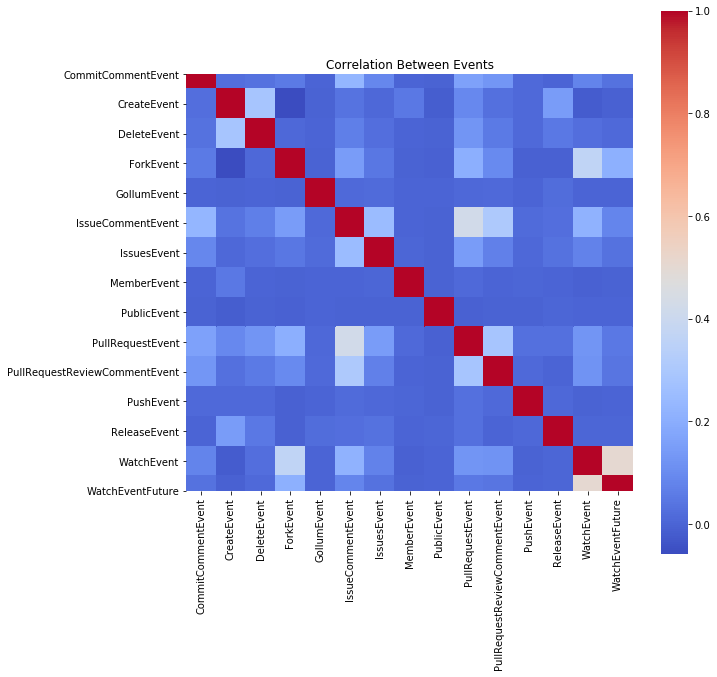

In [7]:
figsize=(10, 10)
plt.figure(figsize=figsize)
sns.heatmap(
    repos[non_empty_events + ['WatchEventFuture']].corr(), 
    square=True, cmap='coolwarm'
)
plt.title('Correlation Between Events');

Only after I finish the following plot did I realize that PCA won't make much sense on this dataset. Even after taking a log, the distributions of events don't look normal.

In [8]:
# standardizer = StandardScaler()
# repos_std = standardizer.fit_transform(repos[non_empty_events])
# pca = PCA(n_components=2)
# repos_2pc = pca.fit_transform(repos_std)

# scaler = MinMaxScaler()
# popularity = scaler.fit_transform(
#     repos['WatchEventFuture'].values.reshape(-1, 1)
# ).flatten()

# figsize=(10, 10)
# plt.figure(figsize=figsize)
# plt.scatter(
#     repos_2pc[:, 0], repos_2pc[:, 0],
#     c=popularity, cmap='coolwarm',
# )
# plt.title('PCA Of Events');

----------------

In [9]:
# TODO: EDA on network/graph properties: centrality, ...

In [10]:
triplets = pd.read_csv('../data/preprocessed/2015-01-01/triplets.csv')
triplets.head()

,user_id,user_name,event_type,repo_id,repo_name
0,9152315,davidjhulse,PushEvent,28635890,davidjhulse/davesbingrewardsbot
1,5581438,jmoon018,PushEvent,26392647,jmoon018/rshell-unit-tester
2,6352424,christoferpeterson,CreateEvent,28677542,christoferpeterson/Vadek
3,66577,JakeWharton,PushEvent,5152285,square/okhttp
4,9221683,git4ruby,PushEvent,28520835,git4ruby/movie_review1


In [11]:
G = nx.from_pandas_edgelist(
    triplets, 
    source='user_id', 
    target='repo_id', 
    create_using=nx.DiGraph()
)

repo_ids = set( triplets['repo_id'].unique() )
repos_view = repos[repos['repo_id'].isin(repo_ids)][['repo_id', 'repo_name']]
for _, row in repos_view.iterrows():
    G.add_node(
        row['repo_id'], 
        node_type='repository', 
        name=row['repo_name']
    )

The in-degree of nodes follows roughly a geometric distribution.

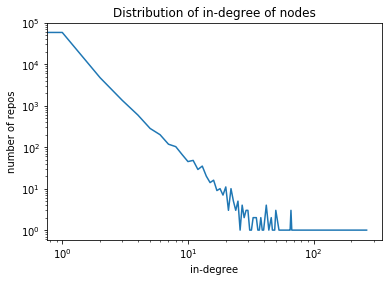

In [12]:
in_degrees = [cnt for _, cnt in G.in_degree()]
deg2cnt = Counter(in_degrees)
in_deg = sorted(set(in_degrees))
in_cnt = [deg2cnt[deg] for deg in in_deg]

plt.loglog(in_deg, in_cnt)
plt.xlabel('in-degree')
plt.ylabel('number of repos')
plt.title('Distribution of in-degree of nodes');

In [13]:
G_ud = G.to_undirected()
G_cc = sorted(
    [G.subgraph(c) for c in nx.connected_components(G_ud)],
    key=len, reverse=True
)

The size of connected components follows roughly a geometric distribution. We can that most of the repo-user relationships are isolated from / not connected with other repos and users.

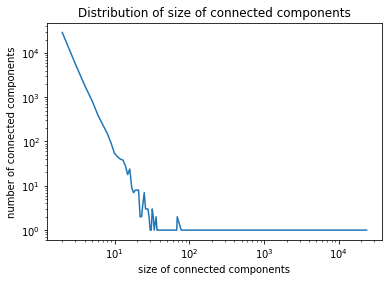

In [14]:
G_cc_sizes = [len(cc) for cc in G_cc]
siz2cnt = Counter(G_cc_sizes)
cc_siz = sorted(set(G_cc_sizes))
cc_cnt = [siz2cnt[siz] for siz in cc_siz]

plt.loglog(cc_siz, cc_cnt)
plt.xlabel('size of connected components')
plt.ylabel('number of connected components')
plt.title('Distribution of size of connected components');

In [15]:
G_mc = G_cc[0]
clo_cen = nx.closeness_centrality(G_mc)

most_centered = sorted(
    ((cen, repo_id) for repo_id, cen in clo_cen.items()),
    reverse=True
)

for _, repo_id in most_centered[:10]:
    print(repos.loc[
        repos['repo_id'] == repo_id, 'repo_name'
    ].values[0])

prakhar1989/awesome-courses
cachethq/Cachet
wasabeef/awesome-android-ui
oliver006/elasticsearch-gmail
begriffs/postgrest
madhurjain/gopee
h5bp/Front-end-Developer-Interview-Questions
Pathgather/please-wait
inf0rmer/blanket
gorhill/uBlock


We can check what are the top 10 most centered (in terms of closeness centrality) repos in the largest connected component of this graph.

Learning resources: 
 - prakhar1989/awesome-courses: a list of university courses for learning computer science
 - wasabeef/awesome-android-ui: a list of Android UI/UX libraries.
 - oliver006/elasticsearch-gmail: a tutorial on using elastic search to index Gmail. 
 - h5bp/Front-end-Developer-Interview-Questions: Well...

Open source software:
 - cachethq/Cachet: an open source status page system.
 - begriffs/postgrest: REST API for Postgres database.
 - madhurjain/gopee: web proxy in Go.
 - Pathgather/please-wait: a UI library for loading page.
 - inf0rmer/blanket: an API wrapper
 - gorhill/uBlock: a blocker for Chromium and Firefox.